In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Supervised projesi için gerekli olan kütüphaneler import edilir.

In [2]:
#import necessary libraries for supervised project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Veri seti çalışma ortamına dahil edilir.

In [3]:
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

**Kişisel Veri Analizi - EDA**

**Numeric EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


df.info() fonksiyonu ile 6362620 veri noktası olduğunu ve 3 veri tipi - float, integer, object - bulundurduğunu öğrendik.

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


df.describe() fonksiyonu ile sütünların toplam veri sayısını, max-min değerlerini, ortalama değerini ayrı ayrı tablo halinde gördüm.

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


df.head() fonksiyonunun kullanarak, head() fonksiyonun default değeri 5 olduğu için veri setinin ilk 5 satırını gördüm.

In [7]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


İlk 10 satırı görmek için ise fonksiyona 10 değerini vererek veri setinin ilk 10 satırını analiz ettim.

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Değerlerde kayıp verilerin olup olmadığını kontrol etmek için df.isnull().sum() fonksiyonunu kullandım ve değerlerin çıktısının hepsinin 0 olduğunu gördüm. Bunun anlamı veri setimizde kayıp değer yok.

**Veri Ön İşlemesi**

**Label Encoding**

Veri setimizde string tipinde ve kategorik şekilde veriler olduğu için bu verileri label encoding ile istediğimiz veri tipine dönüştürüyoruz.  

Mesela type sütünu. Label encoding için uygun çünkü belli kategorik stringler var. PAYMENT, DEBIT stringleri gibi. Label encoder yaparak bu string veri tiplerine integer numaral atayacağız. 

Label encoding yapmak için sklearn kütüphanesinden import ediyoruz.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


Type sütünundaki veriler label encoding için uygun
Label Encoding ile type verisini integer formatına getirdim.

nameDest ve nameOrig sütünları da string içeriyor ama onları label encoding yapamıyorum çünkü yer alan stringler kategorik değil. Çok çeşitli string konfigirasyonları içeriyorlar.

In [11]:
df = df.drop(columns=['nameDest'])


In [12]:
df = df.drop(columns = ['nameOrig'])

nameDest ve nameOrig sütünundaki veriler integer veya float formatında değil yani bizim çalışabileceğimz format değil bu yüzden onları drop ediyorum. 

In [13]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,4,181.00,181.00,0.00,0.0,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,3,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,3,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,3,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,3,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,2,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


Veriyi ufak bir ön işlemeden geçirdikten sonra kullanabileceğim formata gelip gelmediğini kontrol etmek için head() fonksiyonunu kullanarak kontrollerimi sağlıyorum.

Tabloya baktığımda verimin artık işlemeye hazır hale geldiğini görüyorum. Type sütünundaki string verileri kategorilerine göre numaralandırılmış. Burdan PAYMENT ın kodunun 3 olduğunu anlıyoruz.

**Visual EDA**

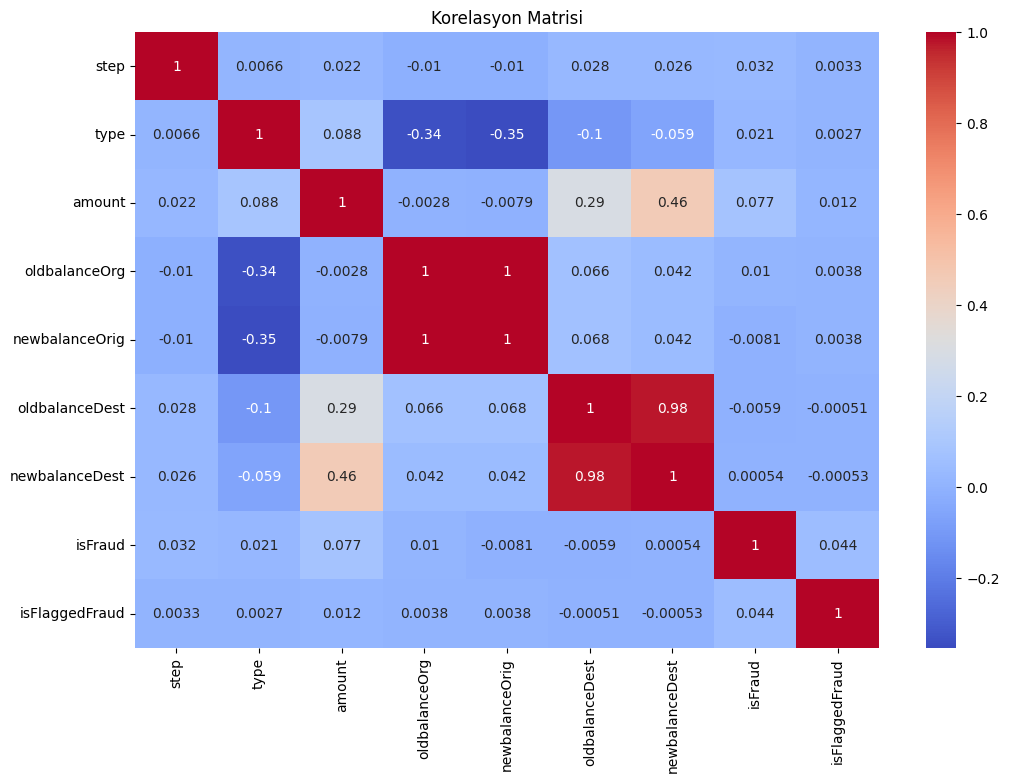

In [14]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

Korelasyon matrisi ile verilerin birbiri ile olan ilşkikerini görselleştiriyorum.

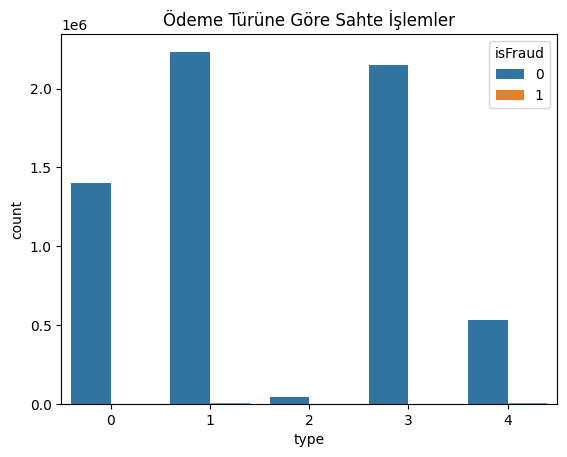

In [15]:
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Ödeme Türüne Göre Sahte İşlemler')
plt.show()

Hangi türde ne kadar fraud durumu olduğunu görmek için bar grafik ile bir görselleştirme yapıyorum. Grafikte gördüğümüz üzere 2. türde en az olduğunu görüyorum.

In [17]:
from sklearn.model_selection import train_test_split
y = df['isFraud'].values #hedef değişkeni
X = df.drop('isFraud', axis=1).values #tahminleyici değişkenler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Veriyi test ve train setlerine ayırarak veri ön işleme adımına devam ettim train_test_split ile.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standar scaler ile verimi model için ölçeklendiriyorum.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier()

Modelim için kNN algoritmasını kullandım

In [24]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

KeyboardInterrupt: 

Hiperparametre optimizasyonu yapmadan manuel olarak bir parametre girdim. Bir de hiperparametre optimizasyonu yaparak bu işlemi tekrarlayalım.

Hiperparametre optimizasyonu için Randimized Search CV yi kullanıcam çünkü  büyük bir veri setim var. Tüm olasılıkları deneyen Grid Search CV yöntemini kullanmak bu veri seti için veri setinin büyüklüğünden dolayı uygun bir seçenek değil. Eğer bu yöntemi kullanırsam işlemimin maliyeti büyük olur.

In [25]:
from sklearn.model_selection import RandomizedSearchCV
# KNN modelini oluştur
knn = KNeighborsClassifier()

# Hiperparametre aralığını belirle
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# RandomizedSearchCV ile tarama yap
random_search = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# En iyi parametreleri göster
print("En iyi parametreler:", random_search.best_params_)


KeyboardInterrupt: 

Hiperparametre optimizasyonu yaptık. En iyi parametreler ile modelimizin performansını tekrar görelim.

In [ ]:
y_pred = random_search.predict(X_test)
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))

**Model Değerlendirme**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**Confusion Matrix**

True Pozitive(TP):1906054 - Model doğru bir şekilde negatif değerleri tahmin etti.

True Negative(TN):1647 - Model doğru bir şekilde pozitif değerleri tahmin etti.

False Pozitive(FP):788 - Model yanlış bir şekilde negatif değerleri tahmin etti.

False Negative(FN):297 - Model yanlış bir şekilde pozitif değerleri tahmin etti.

**Clasification Report**

Precision (Kesinlik)

Model negatif değerleri %100 doğru tahmin etti.
Model pozitif değerleri %85 doğru tahmin etti.

Recall (Hatırlama)

Model, gerçek negatif sınıfların %100’ünü doğru tahmin etmiş.
Model, gerçek pozitif sınıfların %68’ini doğru tahmin etmiş.


F1 Score

Negatif değer için modelimiz iyi bir f1 scoruna sahip.
Pozitif değer için f1 skoru 0.75.


Yaptığım model negatif sınıflar için gayet iyi çalışıyor ama pozitif sınıflarda biraz sıkıntı yaşıyor.